In [1]:
import twint
import nest_asyncio
import pandas as dp
import re
import matplotlib.pyplot as plt
import numpy as np

nest_asyncio.apply()

In [2]:
c = twint.Config()
c.Search = 'vaccine saudi'
c.Since = '2021-07-26'
c.Until = '2021-07-27'
c.Hide_output = True
c.Pandas = True
twint.run.Search(c)
dataframe = twint.storage.panda.Tweets_df 

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [3]:
dataframe.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [4]:
#extract year,month,day into new columns from datetime column
dataframe['year']=dp.to_datetime(dataframe['date']).dt.strftime('%Y')
dataframe['month']=dp.to_datetime(dataframe['date']).dt.strftime('%m')
dataframe['day']=dp.to_datetime(dataframe['date']).dt.strftime('%A')

In [5]:
def preprocess_tweets(tweet):
    
    fo = open("stopwords.txt", "r+")
    stop_words = list(fo.read().split(','))
    translation={39:None}
    processed_tweet = tweet
    processed_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in str(stop_words).translate(translation))
    return(processed_tweet)
dataframe['Processed Tweet'] = dataframe['tweet'].apply(lambda x: preprocess_tweets(x.lower()))

In [6]:
#here we are making a new column 'polarity' by applying textblob function on the processed tweets which are in english language
from textblob import TextBlob
dataframe['polarity'] = dataframe[dataframe['language']=='en']['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])

In [7]:
dataframe['sentiment'] = dataframe['polarity'].apply(lambda x: 'positive' if x > 0 else('negative' if x<0  else 'neutral'))

In [8]:
dataframe[['year','month','day','username','Processed Tweet','language','sentiment']]

,year,month,day,username,Processed Tweet,language,sentiment
0,2021,07,Tuesday,Zeinobia,ksa 25 million covid19 vaccine jabs administra...,en,neutral
1,2021,07,Tuesday,SARFARA74847146,visa attested saudi embassy mumbai carry attes...,en,neutral
2,2021,07,Tuesday,yasserfaisal9,saudi passport holder visa uk coranteded days ...,en,neutral
3,2021,07,Tuesday,yasserfaisal9,saudi passport holder visa uk family visit cou...,en,neutral
4,2021,07,Tuesday,AbadiaEn,covid 19 college roommates covid vaccine kidne...,en,neutral
...,...,...,...,...,...,...,...
88,2021,07,Monday,UZAIRAH67443693,gazette salam appointment baghair vaccine laga...,in,neutral
89,2021,07,Monday,MuriithiPius,kenya connections private firm imported russia...,en,negative
90,2021,07,Monday,Maniam20008263,saudi donate million vaccine dos,fr,neutral
91,2021,07,Monday,sikanderc21,dear sir iqama holder vaccinated pakistan atte...,en,neutral


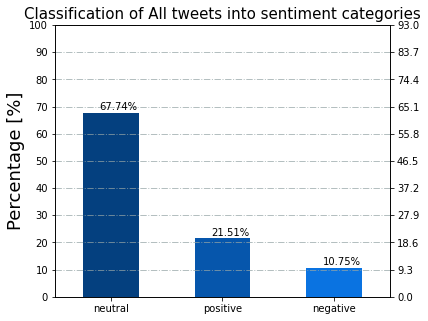

In [9]:
plt.figure(figsize=(6,5))
plt.title('Classification of All tweets into sentiment categories',fontsize=15)
plt.ylabel('Percentage [%]',fontsize=18)
ax = (dataframe.sentiment.value_counts()/len(dataframe)*100).plot(kind="bar", rot=0,color=['#04407F','#0656AC','#0A73E1'])
ax.set_yticks(np.arange(0, 110, 10))
plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='y', alpha=0.7)
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(dataframe)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

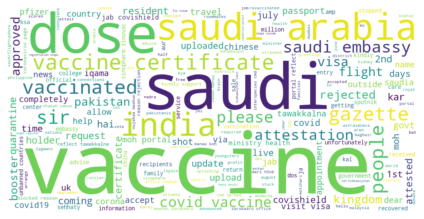

In [10]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(tweet for tweet in dataframe['Processed Tweet'].astype(str))
wordcloud = WordCloud(
    background_color = 'white',
    width = 1000,
    height = 500).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.rcParams['figure.figsize'] = [20, 20]
plt.tight_layout()